## Open Data Science
### Задание №2

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dt = pd.read_csv('howpop_train.csv')

dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
url                 134137 non-null object
domain              134137 non-null object
post_id             134137 non-null int64
published           134137 non-null object
author              97657 non-null object
flow                97048 non-null object
polling             134137 non-null bool
content_len         134137 non-null int64
title               134137 non-null object
comments            134137 non-null int64
favs                134137 non-null int64
views               134137 non-null int64
votes_plus          133566 non-null float64
votes_minus         133566 non-null float64
views_lognorm       134137 non-null float64
favs_lognorm        134137 non-null float64
comments_lognorm    134137 non-null float64
dtypes: bool(1), float64(5), int64(5), object(6)
memory usage: 16.5+ MB


In [7]:
dt.shape

(134137, 17)

In [11]:
dt.drop(filter(lambda c: c.endswith('_lognorm'), dt.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [13]:
dt.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/116807/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [14]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [17]:
print(dt.published.dtype)
dt['published'] = pd.to_datetime(dt.published, yearfirst = True)
print(dt.published.dtype)

object
datetime64[ns]


In [18]:
dt['year'] = [d.year for d in dt.published]
dt['month'] = [d.month for d in dt.published]

dt['dayofweek'] = [d.isoweekday() for d in dt.published]
dt['hour'] = [d.hour for d in dt.published]

dt['year-month'] = [str(d.year) + '-' + str(d.month) for d in dt.published]

In [19]:
dt.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


### 1. В каком месяце (и какого года) было больше всего публикаций?

count     134137
unique       106
top       2015-3
freq        2189
Name: year-month, dtype: object

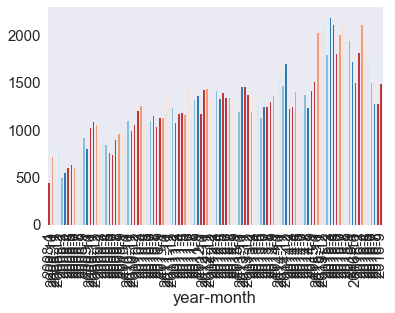

In [88]:
dt.groupby('year-month')['url'].count().plot(kind='bar')

dt['year-month'].describe()

В марте 2015

### 2. Проанализируйте публикации в месяце из предыдущего вопроса


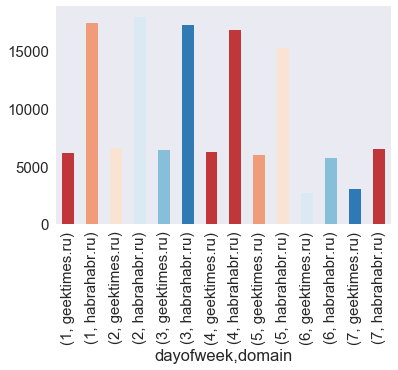

In [97]:
dt.groupby(['dayofweek', 'domain'])['url'].count().plot(kind='bar')

1. habrahabr в целом популярнее geektimes ~ >2 раза.
2. активность создания постов на geektimes практически одинаковая в течение недели.
3. активность на habr'e спадает на выходных.
4. на geektimes в воскресенье в среднем активность создания постов в 2 раза меньше чем в другие дни.

### 3. Когда лучше всего публиковать статью?

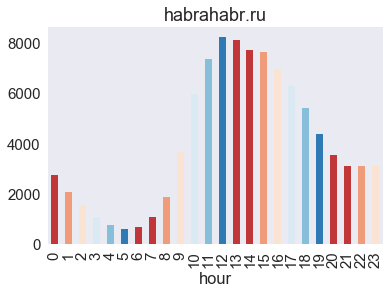

In [108]:
dt[dt['domain'] == 'habrahabr.ru'].groupby(['hour'])['views'].count().plot(kind='bar', title='habrahabr.ru')


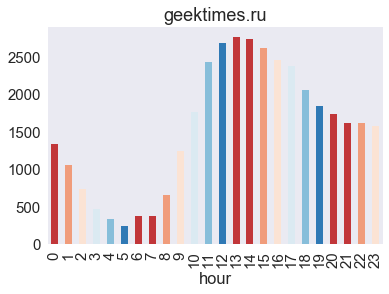

In [109]:
dt[dt['domain'] == 'geektimes.ru'].groupby(['hour'])['views'].count().plot(kind='bar', title='geektimes.ru')

Видно, что самые большие просмотры приходятся на промежуток 12:00-15:00

### 4.Сравните субботы и понедельники

dayofweek
1    13.767939
2    13.553652
3    13.525232
4    13.583832
5    13.302320
6    13.522912
7    14.465307
Name: hour, dtype: float64

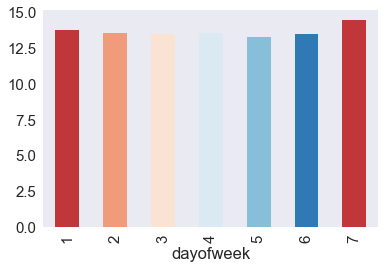

In [120]:
dt.groupby(['dayofweek'])['hour'].mean().plot(kind='bar')
dt.groupby(['dayofweek'])['hour'].mean()

в среднем, Авторы стараются выкладывать свои статьи в ~13:00